<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

def load_quickdraw10(path):
  data = np.load(path)
  X = data['arr_0']
  y = data['arr_1']
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42 )
  return X_train, y_train, X_test, y_test

In [3]:
X_train, y_train, X_test, y_test = load_quickdraw10('quickdraw10.npz')

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [33]:
##### Your Code Here #####
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad, Adamax

def create_model(lr=.01, opt='SGD'):
  if opt == 'SGD':
    optimizer = SGD(learning_rate=lr)
  if opt == 'Adam':
    optimizer = Adam(learning_rate=lr)
  if opt == 'Adadelta':
    optimizer = Adadelta(learning_rate=lr)
  if opt == 'Adagrad':
    optimizer = Adagrad(learning_rate=lr)
  if opt == 'Adamax':
    optimizer = Adamax(learning_rate=lr)

  model = Sequential(
      [
       Dense(32, activation='relu', input_dim=784),
       Dense(32, activation='relu'),
       Dense(10, activation='softmax')       
      ]
  )
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [9]:
quickdraw10_model_32 = create_model()
quickdraw10_model_64 = create_model()
quickdraw10_model_16 = create_model()
quickdraw10_model_128 = create_model()
quickdraw10_model_8 = create_model()

In [10]:
bt_32 = quickdraw10_model_32.fit(X_train, y_train,
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
2500/2500 [==============================] - 4s 1ms/step - loss: 5.1464 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1006
Epoch 2/25
2500/2500 [==============================] - 4s 1ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1002
Epoch 3/25
2500/2500 [==============================] - 4s 1ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/25
2500/2500 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/25
2500/2500 [==============================] - 4s 1ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.0993
Epoch 6/25
2500/2500 [==============================] - 4s 1ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1001
Epoch 7/25
2500/2500 [==============================] - 3s 1ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy:

In [11]:
bt_64 = quickdraw10_model_64.fit(X_train, y_train,
                                epochs=25,
                                batch_size=64,
                                validation_data=(X_test, y_test))

Epoch 1/25
1250/1250 [==============================] - 3s 2ms/step - loss: 5.4803 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.0993
Epoch 2/25
1250/1250 [==============================] - 3s 3ms/step - loss: 2.3029 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/25
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3029 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1019
Epoch 4/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 5/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.0988
Epoch 6/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.0993
Epoch 7/25
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy:

In [12]:
bt_16 = quickdraw10_model_16.fit(X_train, y_train,
                                epochs=25,
                                batch_size=16,
                                validation_data=(X_test, y_test))

Epoch 1/25
5000/5000 [==============================] - 6s 1ms/step - loss: 40.2632 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.1001
Epoch 2/25
5000/5000 [==============================] - 6s 1ms/step - loss: 63.7671 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.0993
Epoch 3/25
5000/5000 [==============================] - 6s 1ms/step - loss: 2.3027 - accuracy: 0.1008 - val_loss: 2.3029 - val_accuracy: 0.1001
Epoch 4/25
5000/5000 [==============================] - 6s 1ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.1006
Epoch 5/25
5000/5000 [==============================] - 6s 1ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.0993
Epoch 6/25
5000/5000 [==============================] - 6s 1ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.0993
Epoch 7/25
5000/5000 [==============================] - 6s 1ms/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3027 - val_accurac

In [13]:
bt_128 = quickdraw10_model_128.fit(X_train, y_train,
                                epochs=25,
                                batch_size=128,
                                validation_data=(X_test, y_test))

Epoch 1/25
625/625 [==============================] - 2s 3ms/step - loss: 25.6675 - accuracy: 0.0969 - val_loss: 2.3205 - val_accuracy: 0.1002
Epoch 2/25
625/625 [==============================] - 1s 2ms/step - loss: 2.3187 - accuracy: 0.0984 - val_loss: 2.3175 - val_accuracy: 0.1000
Epoch 3/25
625/625 [==============================] - 2s 2ms/step - loss: 2.3060 - accuracy: 0.0966 - val_loss: 2.3148 - val_accuracy: 0.0993
Epoch 4/25
625/625 [==============================] - 1s 2ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3152 - val_accuracy: 0.0995
Epoch 5/25
625/625 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.0996 - val_loss: 2.3152 - val_accuracy: 0.0995
Epoch 6/25
625/625 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.0983 - val_loss: 2.3152 - val_accuracy: 0.0993
Epoch 7/25
625/625 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.0991 - val_loss: 2.3152 - val_accuracy: 0.0995
Epoch

In [14]:
bt_8 = quickdraw10_model_8.fit(X_train, y_train,
                                epochs=25,
                                batch_size=8,
                                validation_data=(X_test, y_test))

Epoch 1/25
10000/10000 [==============================] - 12s 1ms/step - loss: 80.5961 - accuracy: 0.0987 - val_loss: 2.3031 - val_accuracy: 0.0988
Epoch 2/25
10000/10000 [==============================] - 12s 1ms/step - loss: 2.3297 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1001
Epoch 3/25
10000/10000 [==============================] - 12s 1ms/step - loss: 2.7478 - accuracy: 0.1004 - val_loss: 2.3028 - val_accuracy: 0.1002
Epoch 4/25
10000/10000 [==============================] - 14s 1ms/step - loss: 2.3029 - accuracy: 0.1000 - val_loss: 2.3028 - val_accuracy: 0.1002
Epoch 5/25
10000/10000 [==============================] - 13s 1ms/step - loss: 2.3029 - accuracy: 0.0975 - val_loss: 2.3029 - val_accuracy: 0.0996
Epoch 6/25
10000/10000 [==============================] - 12s 1ms/step - loss: 2.3029 - accuracy: 0.0993 - val_loss: 2.3028 - val_accuracy: 0.0988
Epoch 7/25
10000/10000 [==============================] - 12s 1ms/step - loss: 2.3029 - accuracy: 0.0999 - val_loss: 

In [15]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_32, bt_64, bt_16, bt_128, bt_8], ["32_", "64_", "16_", "128_", "8_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,5.146444,0.098937,2.302603,0.10065,0,32_
1,2.302674,0.098725,2.302636,0.10025,1,32_
2,2.302659,0.099487,2.302608,0.10000,2,32_
3,2.302775,0.098587,2.302618,0.10000,3,32_
4,2.302713,0.099475,2.302675,0.09925,4,32_


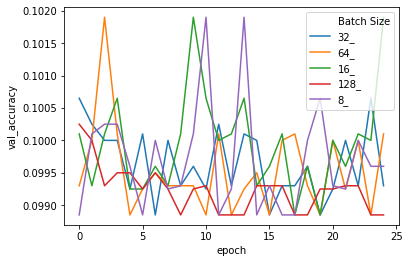

In [16]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

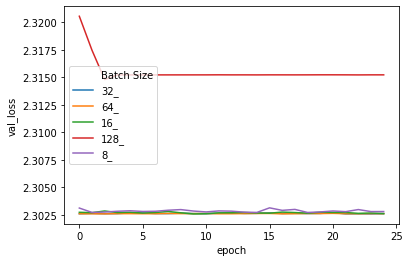

In [17]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);

The best performing model was the one with a batch size of 16. It had a .38% increase of validation accuracy compared to yesterday's model. The models using higher batch sizes had expectantly lower validation accuracy, but surprisingly the model with the batch size of 8 also had lower validation accuracy.

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [20]:
quickdraw10_model_1 = create_model(lr=1)
quickdraw10_model_01 = create_model(lr=0.1)
quickdraw10_model_001 = create_model(lr=0.01)
quickdraw10_model_0001 = create_model(lr=0.001)
quickdraw10_model_00001 = create_model(lr=0.0001)

In [44]:
bt_1 = quickdraw10_model_1.fit(X_train, y_train,
                                epochs=25,
                                batch_size=16,
                                validation_data=(X_test, y_test))

Epoch 1/25
5000/5000 [==============================] - 11s 2ms/step - loss: 2.3179 - accuracy: 0.0996 - val_loss: 2.3226 - val_accuracy: 0.1001
Epoch 2/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3175 - accuracy: 0.1002 - val_loss: 2.3137 - val_accuracy: 0.1000
Epoch 3/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3181 - accuracy: 0.0984 - val_loss: 2.3155 - val_accuracy: 0.0993
Epoch 4/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3175 - accuracy: 0.1002 - val_loss: 2.3171 - val_accuracy: 0.1001
Epoch 5/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3178 - accuracy: 0.0987 - val_loss: 2.3194 - val_accuracy: 0.1019
Epoch 6/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3173 - accuracy: 0.1009 - val_loss: 2.3074 - val_accuracy: 0.0993
Epoch 7/25
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3172 - accuracy: 0.1004 - val_loss: 2.3147 - val_accurac

In [45]:
bt_01 = quickdraw10_model_01.fit(X_train, y_train,
                                epochs=25,
                                batch_size=16,
                                validation_data=(X_test, y_test))

Epoch 1/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3041 - accuracy: 0.0996 - val_loss: 2.3033 - val_accuracy: 0.1006
Epoch 2/25
5000/5000 [==============================] - 11s 2ms/step - loss: 2.3040 - accuracy: 0.1020 - val_loss: 2.3034 - val_accuracy: 0.1001
Epoch 3/25
5000/5000 [==============================] - 11s 2ms/step - loss: 2.3040 - accuracy: 0.0997 - val_loss: 2.3035 - val_accuracy: 0.1001
Epoch 4/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3040 - accuracy: 0.0990 - val_loss: 2.3038 - val_accuracy: 0.1006
Epoch 5/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3040 - accuracy: 0.0994 - val_loss: 2.3041 - val_accuracy: 0.0993
Epoch 6/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3041 - accuracy: 0.0986 - val_loss: 2.3037 - val_accuracy: 0.1006
Epoch 7/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3041 - accuracy: 0.1003 - val_loss: 2.3033 - val_accurac

In [46]:
bt_001 = quickdraw10_model_001.fit(X_train, y_train,
                                epochs=25,
                                batch_size=16,
                                validation_data=(X_test, y_test))

Epoch 1/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3026 - accuracy: 0.1003 - val_loss: 2.3028 - val_accuracy: 0.0988
Epoch 2/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1002
Epoch 3/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 4/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.0988
Epoch 5/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0993
Epoch 6/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.0993
Epoch 7/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [47]:
bt_0001 = quickdraw10_model_0001.fit(X_train, y_train,
                                epochs=25,
                                batch_size=16,
                                validation_data=(X_test, y_test))

Epoch 1/25
5000/5000 [==============================] - 10s 2ms/step - loss: 0.7898 - accuracy: 0.7603 - val_loss: 0.8177 - val_accuracy: 0.7599
Epoch 2/25
5000/5000 [==============================] - 9s 2ms/step - loss: 0.7751 - accuracy: 0.7668 - val_loss: 0.8258 - val_accuracy: 0.7643
Epoch 3/25
5000/5000 [==============================] - 9s 2ms/step - loss: 0.7630 - accuracy: 0.7720 - val_loss: 0.8171 - val_accuracy: 0.7632
Epoch 4/25
5000/5000 [==============================] - 9s 2ms/step - loss: 0.7509 - accuracy: 0.7753 - val_loss: 0.7876 - val_accuracy: 0.7718
Epoch 5/25
5000/5000 [==============================] - 9s 2ms/step - loss: 0.7367 - accuracy: 0.7798 - val_loss: 0.7812 - val_accuracy: 0.7699
Epoch 6/25
5000/5000 [==============================] - 9s 2ms/step - loss: 0.7280 - accuracy: 0.7815 - val_loss: 0.7731 - val_accuracy: 0.7699
Epoch 7/25
5000/5000 [==============================] - 9s 2ms/step - loss: 0.7166 - accuracy: 0.7860 - val_loss: 0.7643 - val_accuracy

In [48]:
bt_00001 = quickdraw10_model_00001.fit(X_train, y_train,
                                epochs=25,
                                batch_size=16,
                                validation_data=(X_test, y_test))

Epoch 1/25
5000/5000 [==============================] - 9s 2ms/step - loss: 0.9521 - accuracy: 0.7002 - val_loss: 0.9758 - val_accuracy: 0.6895
Epoch 2/25
5000/5000 [==============================] - 9s 2ms/step - loss: 0.9363 - accuracy: 0.7056 - val_loss: 0.9445 - val_accuracy: 0.7059
Epoch 3/25
5000/5000 [==============================] - 9s 2ms/step - loss: 0.9236 - accuracy: 0.7114 - val_loss: 0.9296 - val_accuracy: 0.7163
Epoch 4/25
5000/5000 [==============================] - 9s 2ms/step - loss: 0.9098 - accuracy: 0.7150 - val_loss: 0.9471 - val_accuracy: 0.7038
Epoch 5/25
5000/5000 [==============================] - 9s 2ms/step - loss: 0.8995 - accuracy: 0.7189 - val_loss: 0.9288 - val_accuracy: 0.7189
Epoch 6/25
5000/5000 [==============================] - 9s 2ms/step - loss: 0.8890 - accuracy: 0.7223 - val_loss: 0.9168 - val_accuracy: 0.7213
Epoch 7/25
5000/5000 [==============================] - 9s 2ms/step - loss: 0.8807 - accuracy: 0.7240 - val_loss: 0.9068 - val_accuracy:

In [49]:
import seaborn as sns
import pandas as pd

learning_rates = []

for exp, result in zip([bt_1, bt_01, bt_001, bt_0001, bt_00001], ["1_", "0.1_", "0.01_", "0.001_", "0.0001_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  learning_rates.append(df)

df = pd.concat(learning_rates)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,2.317941,0.099588,2.322575,0.1001,0,1_
1,2.317523,0.100250,2.313651,0.1000,1,1_
2,2.318112,0.098362,2.315492,0.0993,2,1_
3,2.317546,0.100175,2.317085,0.1001,3,1_
4,2.317752,0.098700,2.319386,0.1019,4,1_


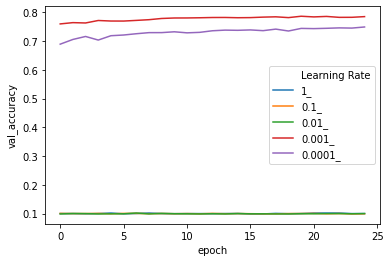

In [50]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

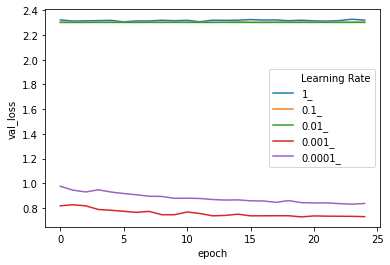

In [51]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

The best performing model was the one with a learning rate of 0.001. It had a 68.34% increase of validation accuracy compared to the previous model and a 68.72% increase of validation accuracy compared to yesterday's model. The models using higher learning rates had expectantly lower validation accuracy, but surprisingly the model with the learning rate of 0.0001 also had lower validation accuracy.

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [52]:
quickdraw10_model_adadelta = create_model(lr=0.001, opt='Adadelta')
quickdraw10_model_adagrad = create_model(lr=0.001, opt='Adagrad')
quickdraw10_model_adam = create_model(lr=0.001, opt='Adam')
quickdraw10_model_adamax = create_model(lr=0.001, opt='Adamax')
quickdraw10_model_sgd = create_model(lr=0.001, opt='SGD')

In [53]:
bt_adadelta = quickdraw10_model_adadelta.fit(X_train, y_train,
                                epochs=25,
                                batch_size=16,
                                validation_data=(X_test, y_test))

Epoch 1/25
5000/5000 [==============================] - 8s 2ms/step - loss: 98.2010 - accuracy: 0.0954 - val_loss: 63.1273 - val_accuracy: 0.1011
Epoch 2/25
5000/5000 [==============================] - 7s 1ms/step - loss: 50.4707 - accuracy: 0.1270 - val_loss: 42.0206 - val_accuracy: 0.1458
Epoch 3/25
5000/5000 [==============================] - 7s 1ms/step - loss: 36.5111 - accuracy: 0.1647 - val_loss: 32.5527 - val_accuracy: 0.1762
Epoch 4/25
5000/5000 [==============================] - 7s 1ms/step - loss: 29.4672 - accuracy: 0.1906 - val_loss: 26.9931 - val_accuracy: 0.1973
Epoch 5/25
5000/5000 [==============================] - 7s 1ms/step - loss: 24.9731 - accuracy: 0.2090 - val_loss: 23.1611 - val_accuracy: 0.2148
Epoch 6/25
5000/5000 [==============================] - 7s 1ms/step - loss: 21.7323 - accuracy: 0.2247 - val_loss: 20.2995 - val_accuracy: 0.2313
Epoch 7/25
5000/5000 [==============================] - 7s 1ms/step - loss: 19.2143 - accuracy: 0.2374 - val_loss: 18.0442 -

In [54]:
bt_adagrad = quickdraw10_model_adagrad.fit(X_train, y_train,
                                epochs=25,
                                batch_size=16,
                                validation_data=(X_test, y_test))

Epoch 1/25
5000/5000 [==============================] - 7s 1ms/step - loss: 6.2657 - accuracy: 0.3082 - val_loss: 2.4394 - val_accuracy: 0.3188
Epoch 2/25
5000/5000 [==============================] - 6s 1ms/step - loss: 2.2112 - accuracy: 0.3225 - val_loss: 2.0745 - val_accuracy: 0.3226
Epoch 3/25
5000/5000 [==============================] - 6s 1ms/step - loss: 2.0106 - accuracy: 0.3321 - val_loss: 1.9617 - val_accuracy: 0.3573
Epoch 4/25
5000/5000 [==============================] - 7s 1ms/step - loss: 1.9159 - accuracy: 0.3628 - val_loss: 1.8884 - val_accuracy: 0.3705
Epoch 5/25
5000/5000 [==============================] - 7s 1ms/step - loss: 1.8479 - accuracy: 0.3778 - val_loss: 1.8345 - val_accuracy: 0.3841
Epoch 6/25
5000/5000 [==============================] - 6s 1ms/step - loss: 1.7963 - accuracy: 0.3895 - val_loss: 1.7929 - val_accuracy: 0.3947
Epoch 7/25
5000/5000 [==============================] - 6s 1ms/step - loss: 1.7556 - accuracy: 0.3986 - val_loss: 1.7598 - val_accuracy:

In [55]:
bt_adam = quickdraw10_model_adam.fit(X_train, y_train,
                                epochs=25,
                                batch_size=16,
                                validation_data=(X_test, y_test))

Epoch 1/25
5000/5000 [==============================] - 7s 1ms/step - loss: 1.8756 - accuracy: 0.4328 - val_loss: 1.4628 - val_accuracy: 0.4894
Epoch 2/25
5000/5000 [==============================] - 7s 1ms/step - loss: 1.3486 - accuracy: 0.5337 - val_loss: 1.3040 - val_accuracy: 0.5408
Epoch 3/25
5000/5000 [==============================] - 7s 1ms/step - loss: 1.2788 - accuracy: 0.5561 - val_loss: 1.1956 - val_accuracy: 0.5860
Epoch 4/25
5000/5000 [==============================] - 7s 1ms/step - loss: 1.2297 - accuracy: 0.5705 - val_loss: 1.1783 - val_accuracy: 0.5904
Epoch 5/25
5000/5000 [==============================] - 7s 1ms/step - loss: 1.1764 - accuracy: 0.5897 - val_loss: 1.1453 - val_accuracy: 0.5993
Epoch 6/25
5000/5000 [==============================] - 7s 1ms/step - loss: 1.1386 - accuracy: 0.6059 - val_loss: 1.1225 - val_accuracy: 0.6261
Epoch 7/25
5000/5000 [==============================] - 9s 2ms/step - loss: 1.0814 - accuracy: 0.6233 - val_loss: 1.0487 - val_accuracy:

In [56]:
bt_adamax = quickdraw10_model_adamax.fit(X_train, y_train,
                                epochs=25,
                                batch_size=16,
                                validation_data=(X_test, y_test))

Epoch 1/25
5000/5000 [==============================] - 7s 1ms/step - loss: 2.8054 - accuracy: 0.3820 - val_loss: 1.4581 - val_accuracy: 0.4916
Epoch 2/25
5000/5000 [==============================] - 7s 1ms/step - loss: 1.3452 - accuracy: 0.5300 - val_loss: 1.2468 - val_accuracy: 0.5624
Epoch 3/25
5000/5000 [==============================] - 7s 1ms/step - loss: 1.1991 - accuracy: 0.5793 - val_loss: 1.1564 - val_accuracy: 0.6000
Epoch 4/25
5000/5000 [==============================] - 7s 1ms/step - loss: 1.1230 - accuracy: 0.6098 - val_loss: 1.1132 - val_accuracy: 0.6084
Epoch 5/25
5000/5000 [==============================] - 7s 1ms/step - loss: 1.0732 - accuracy: 0.6302 - val_loss: 1.0631 - val_accuracy: 0.6437
Epoch 6/25
5000/5000 [==============================] - 7s 1ms/step - loss: 1.0399 - accuracy: 0.6477 - val_loss: 1.0453 - val_accuracy: 0.6551
Epoch 7/25
5000/5000 [==============================] - 7s 1ms/step - loss: 1.0082 - accuracy: 0.6645 - val_loss: 1.0335 - val_accuracy:

In [57]:
bt_sgd = quickdraw10_model_sgd.fit(X_train, y_train,
                                epochs=25,
                                batch_size=16,
                                validation_data=(X_test, y_test))

Epoch 1/25
5000/5000 [==============================] - 9s 2ms/step - loss: 1.8018 - accuracy: 0.4082 - val_loss: 1.4215 - val_accuracy: 0.5188
Epoch 2/25
5000/5000 [==============================] - 6s 1ms/step - loss: 1.3182 - accuracy: 0.5639 - val_loss: 1.2656 - val_accuracy: 0.5673
Epoch 3/25
5000/5000 [==============================] - 6s 1ms/step - loss: 1.1932 - accuracy: 0.6041 - val_loss: 1.1774 - val_accuracy: 0.6125
Epoch 4/25
5000/5000 [==============================] - 6s 1ms/step - loss: 1.1128 - accuracy: 0.6382 - val_loss: 1.1064 - val_accuracy: 0.6381
Epoch 5/25
5000/5000 [==============================] - 6s 1ms/step - loss: 1.0462 - accuracy: 0.6701 - val_loss: 1.0477 - val_accuracy: 0.6709
Epoch 6/25
5000/5000 [==============================] - 6s 1ms/step - loss: 0.9982 - accuracy: 0.6860 - val_loss: 1.0019 - val_accuracy: 0.6841
Epoch 7/25
5000/5000 [==============================] - 6s 1ms/step - loss: 0.9657 - accuracy: 0.6954 - val_loss: 0.9744 - val_accuracy:

In [58]:
import seaborn as sns
import pandas as pd

optimizers = []

for exp, result in zip([bt_adadelta, bt_adagrad, bt_adam, bt_adamax, bt_sgd], ["Adadelta_", "Adagrad_", "Adam_", "Adamax_", "SGD_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Optimizer'] = result

  optimizers.append(df)

df = pd.concat(optimizers)
df['Optimizer'] = df['Optimizer'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Optimizer
0,98.200989,0.095362,63.127308,0.10115,0,Adadelta_
1,50.470722,0.127037,42.020565,0.14575,1,Adadelta_
2,36.511124,0.164725,32.552734,0.17620,2,Adadelta_
3,29.467224,0.190625,26.993116,0.19730,3,Adadelta_
4,24.973137,0.209025,23.161051,0.21475,4,Adadelta_


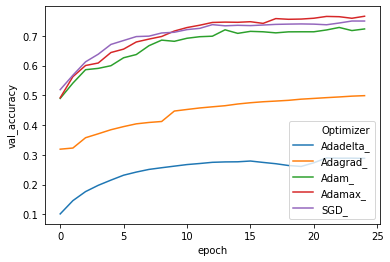

In [59]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Optimizer', data=df);

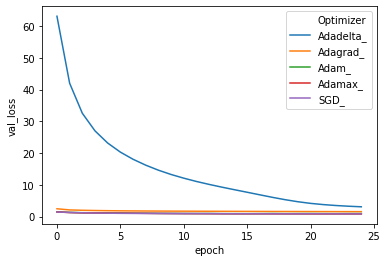

In [60]:
sns.lineplot(x='epoch', y='val_loss', hue='Optimizer', data=df);

The best performing model was the one with the Adamax optimizer. It had a 1.97% decrease of validation accuracy compared to the previous model and a 66.75% increase of validation accuracy compared to yesterday's model. It seems that Adagrad and Adadelta are the worst in terms of validation accuracy.

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
The Backpropagation algorithm looks for the minimum value of the error function in weight space using a technique called the delta rule or gradient descent. The weights that minimize the error function is then considered to be a solution to the learning problem.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


